In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from src.pre_processing import *


## Import and split data

In [51]:
public_df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-04-19T20_50_09.379Z.csv')

In [52]:
public_df = public_df.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

In [53]:
workLevels = {0: 0, 'slightly': 1, 'moderately': 2, 'very': 3, 'completely': 4}
public_df['workPilingUp'] = public_df['workPilingUp'].map(workLevels)

In [54]:
train, test = train_test_split(public_df, shuffle=True)

In [55]:
pd.set_option('display.max_columns', 999)

In [37]:
len(train)/len(public_df)

0.749932669000808

In [12]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
spendingDayOther,5482,0.984378
otherEmotion,5471,0.982403
workPositiveInfluence,5132,0.921530
spendingDay,5016,0.900700
connectedPatients,5016,0.900700
connectedColleagues,5016,0.900700
sleptFor,5016,0.900700
emotionResponse,4229,0.759382
emotionResponseHelpful,2560,0.459688
workPilingUp,895,0.160711


In [119]:
train['timestamp'].head()

6314    1506488667
1705    1495708214
6414    1506631851
4038    1504010492
2621    1503583645
Name: timestamp, dtype: int64

In [14]:
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
train.timestamp.dt.hour

4534     4
3140     1
3799    14
7346    22
6314     5
2035    17
2219     3
3819    16
5805     7
6528     1
226      0
1704    10
5204    15
2783    22
3836    17
2454    22
2410    20
71       0
2548     3
2020    16
5321    22
616     19
2852     1
3924    22
5922    12
0        1
1062     2
3265    16
3580    18
5773    20
        ..
6351    18
1978    21
3284    18
2520    18
2737    20
4168    21
1269    20
6976     6
6675    16
5759    10
4852    19
2838     1
3574    18
572     19
6259    12
6726     1
6056    14
2860     3
2204     2
397      3
4260     4
821     22
1663     2
3224    14
3055    19
6548     9
3990     3
5971     4
881     16
3563    18
Name: timestamp, Length: 5569, dtype: int64

In [56]:
train_subset = create_subset(train, cols_to_keep)
test_subset = create_subset(test, cols_to_keep)

In [57]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5569 entries, 5843 to 6712
Data columns (total 40 columns):
responseLagSeconds             5025 non-null float64
dailyAlertNumber               5025 non-null float64
tiredness                      4804 non-null float64
feelingEmotion                 5569 non-null int64
generalEmotion                 5569 non-null object
specificEmotion                5569 non-null object
intensity                      5569 non-null float64
generalTrigger                 5544 non-null object
specificTrigger                5544 non-null object
bodySensationIntensity         5569 non-null float64
bodySensationForehead          5569 non-null int64
bodySensationEyes              5569 non-null int64
bodySensationJaw               5569 non-null int64
bodySensationNeck              5569 non-null int64
bodySensationShoulders         5569 non-null int64
bodySensationChest             5569 non-null int64
bodySensationArms              5569 non-null int64
bodySensa

## Why is the code below not working to fill NaN's?

In [104]:
train.head()

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,surveyNumber,timestamp,startTime,associatedAlert,responseLagSeconds,dailyAlertNumber,spendingDay,spendingDayOther,sleptFor,tiredness,connectedColleagues,connectedPatients,feelingEmotion,generalEmotion,specificEmotion,otherEmotion,intensity,trigger,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionResponse,emotionDuration,emotionResponseHelpful,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence
2758,854071,3c3dad27-e287-48a3-8579-254293212a4f.4c67fc81b...,4c7118d9825.a7722727-8315-4afd-99f8-1224ab2b04db,2017-08-24T21:45:50.281Z,1503611150,1,1503610977,2017-08-24T17:42:57.249-0400,4c7117346d2.6384f64a-113f-42d5-ae30-57a3d0bf44dd,17083.0,1.0,NaN,NaN,NaN,0.5,NaN,NaN,yes,fear,anxious,NaN,0.75,Too much to do. I have a weddings to attend th...,workStress,workload,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,60+,helpful,0,0,0,0,0,0,0,0,0,0,0,0,very,NaN
7139,910749,0e8a8ca1-855c-4884-8c92-16b1ad954d9e.4cd92b435...,4d01e3df127.afe728c5-0518-40d4-bd57-697a1e5f7299,2017-10-08T21:25:11.236Z,1507497911,27,1507497774,2017-10-08T15:22:54.380-0600,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,yes,fear,worried,NaN,0.50,Wife is sad and I don't know what's wrong or h...,socialStress,soChallenge,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,5,neutral,0,0,0,0,0,0,0,0,0,0,0,0,slightly,NaN
162,409440,c35cc104-19cc-4a83-ad8f-4c94032581af.487da414e...,4881e9e8b21.eec9b225-dba2-4796-ad73-f3329300b692,2016-10-16T16:42:23.140Z,1476636143,1,1476574701,2016-10-15T16:38:21.925-0700,4881e930f64.96958f6d-9e8d-4b71-bd4f-21bbb8ea7182,5349.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,enthusiastic,NaN,0.75,Dance class,wellbeing,exercise,0.75,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,enjoyment,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2529,852370,e0b7aa4e-a833-4732-9e7e-2be39739255c.4c6dfba3d...,4c6e7ff3982.05098ba0-e599-4d13-b1bb-2d3dad1d9a6a,2017-08-24T02:23:51.049Z,1503541431,1,1503541028,2017-08-23T20:17:08.308-0600,4c6e7c1effc.1b56a19c-6074-434b-8f39-9ae8ad577dc4,77.0,4.0,NaN,NaN,NaN,0.5,NaN,NaN,yes,enjoyment,enthusiastic,NaN,0.75,I found a possible to a huge problem in my dep...,workSatisfaction,success,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,completely,NaN
997,467833,3e9397a2-d831-4dd2-a646-9b4db2c85e80.48af42a8f...,48d940bbe61.cb353a7c-2125-43e8-80fa-dc70daa74690,2016-11-12T02:54:31.072Z,1478919271,17,1478919218,2016-11-11T18:53:38.444-0800,48d9403df2d.0bfecb26-43c6-40ea-890f-a94bf9d3725f,4962.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,NaN,0.25,Going on a date I'm excited about,socialSupport,timeSO,0.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,observation,60,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [105]:
train['dailyAlertNumber'].value_counts()

2.0    1774
1.0    1709
3.0    1127
4.0     224
5.0     187
Name: dailyAlertNumber, dtype: int64

In [18]:
train_subset[train_subset.isnull().any(axis=1)].index

Int64Index([1892, 1864, 1885, 1873, 1861, 1859, 1872, 1877, 1863, 1868, 1888,
            1879, 1878, 1871, 1862, 1860, 1870, 1876, 1866, 1883, 1875, 1889],
           dtype='int64')

In [19]:
train_subset['generalTrigger'].loc[train_subset[train_subset.isnull().any(axis=1)].index] = train_subset['generalTrigger'].mode()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
train_subset[['generalTrigger', 'specificTrigger']].mode()

,generalTrigger,specificTrigger
0,wellbeing,play


In [55]:
train_subset = train_subset['generalTrigger'].fillna(train_subset['generalTrigger'].mode())

In [20]:
train_subset[train_subset.isnull().any(axis=1)]

,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity
1892,yes,anger,angry,0.75,NaN,NaN,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1864,yes,enjoyment,peaceful,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0
1885,yes,anger,angry,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1873,no,sadness,discouraged,0.25,NaN,NaN,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0
1861,yes,anger,irritated,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
1859,yes,anger,angry,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
1872,no,fear,afraid,0.25,NaN,NaN,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1877,yes,other,ashamed,0.25,NaN,NaN,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1863,yes,enjoyment,peaceful,0.50,NaN,NaN,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60+,0,0,0,0,0,0,0,0,0,0,0,0
1868,yes,sadness,sad,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
train_subset['emotionDuration'] = train_subset['emotionDuration'].replace('60+', 90)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
test_subset['emotionDuration'] = test_subset['emotionDuration'].replace('60+', 90)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
train_subset = train_subset.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

In [52]:
test_subset = test_subset.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

## Drop NaN's instead

In [58]:
train_subset = train_subset.dropna()
test_subset = test_subset.dropna()

In [59]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3953 entries, 5843 to 6712
Data columns (total 40 columns):
responseLagSeconds             3953 non-null float64
dailyAlertNumber               3953 non-null float64
tiredness                      3953 non-null float64
feelingEmotion                 3953 non-null int64
generalEmotion                 3953 non-null object
specificEmotion                3953 non-null object
intensity                      3953 non-null float64
generalTrigger                 3953 non-null object
specificTrigger                3953 non-null object
bodySensationIntensity         3953 non-null float64
bodySensationForehead          3953 non-null int64
bodySensationEyes              3953 non-null int64
bodySensationJaw               3953 non-null int64
bodySensationNeck              3953 non-null int64
bodySensationShoulders         3953 non-null int64
bodySensationChest             3953 non-null int64
bodySensationArms              3953 non-null int64
bodySensa

## Dummify categoricals

In [56]:
train_subset.head()

,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity
2758,1,fear,anxious,0.75,workStress,workload,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0
7139,1,fear,worried,0.50,socialStress,soChallenge,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
162,1,enjoyment,enthusiastic,0.75,wellbeing,exercise,0.75,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
2529,1,enjoyment,enthusiastic,0.75,workSatisfaction,success,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
997,1,enjoyment,happy,0.25,socialSupport,timeSO,0.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
for col in cols_to_dummify:
    dummify_clustering(train_subset, col)
    dummify_clustering(test_subset, col)

In [65]:
train_subset.drop(['globalPolitics'], axis=1, inplace=True)

In [66]:
train_subset.head()

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,climateChange,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,healthProblems,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload
5843,2743.0,3.0,0.25,1,0.75,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3782,96.0,2.0,0.00,1,0.75,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7144,3.0,5.0,0.75,1,0.75,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6555,92.0,3.0,0.75,1,1.00,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5190,76.0,1.0,0.75,1,0.75,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Scale data

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [233]:
# scaler = StandardScaler()
# # train_subset['emotionDuration'].reshape(-1,1)
# scaler.fit(train_subset)
# new_train = scaler.transform(train_subset)

In [68]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train_subset)
new_train = scaler.transform(train_subset)
new_train

array([[0.24898443, 0.5       , 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.24812919, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24809914, 1.        , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.2613293 , 1.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24852401, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.24809946, 0.25      , 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [85]:
new_test = scaler.transform(test_subset)
new_test

array([[0.2536577 , 0.25      , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.24900026, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.24838605, 0.25      , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24813501, 0.25      , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.24810108, 0.25      , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.24814631, 0.5       , 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [69]:
np.unique(new_train, return_counts=True)

(array([0.        , 0.04494382, 0.10676277, ..., 0.66292135, 0.75      ,
        1.        ]),
 array([334305,    742,      1, ...,    488,   3082,  20440]))

In [73]:
for x in test_subset.columns:
    if x not in train_subset.columns:
        print(x)

healthcare


In [74]:
test_subset.drop(['healthcare'], axis=1, inplace=True)

## Train initial kMeans model

In [75]:
kmeans = KMeans(n_clusters=6).fit(new_train)

In [86]:
predictions = kmeans.predict(new_test)

In [87]:
predictions

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [88]:
np.unique(predictions, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([169, 344, 241, 144, 155, 234]))

In [89]:
kmeans2 = KMeans(n_clusters=3).fit(new_train)

In [90]:
predictions2 = kmeans2.predict(new_test)

In [91]:
predictions2

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [92]:
np.unique(predictions2, return_counts=True)

(array([0, 1, 2], dtype=int32), array([359, 326, 602]))

## Silhouette Scores

In [83]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [93]:
silhouette_score(new_test, predictions, metric='euclidean')

0.16734367779978546

In [94]:
silhouette_score(new_test, predictions2, metric='jaccard')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


0.16505639215366286

For n_clusters = 2 The average silhouette_score is : 0.1382674107982778


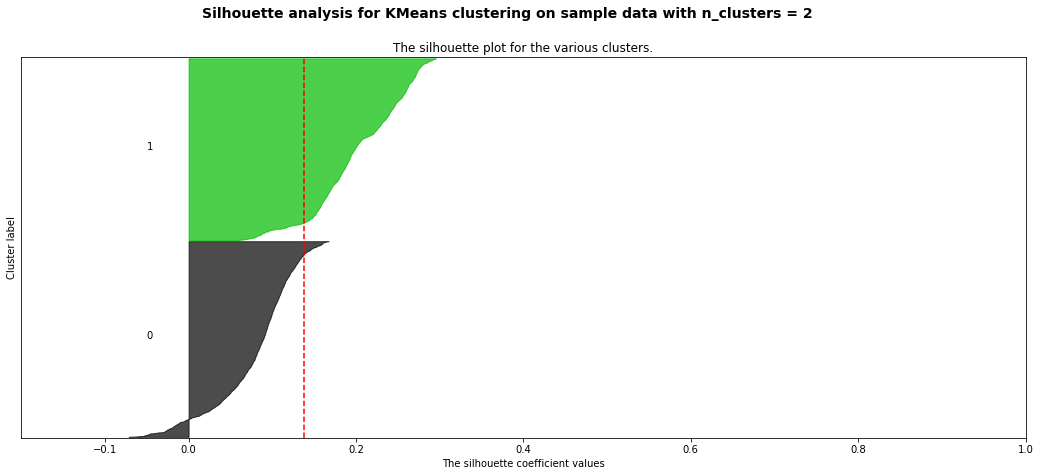

For n_clusters = 3 The average silhouette_score is : 0.12485941492176363


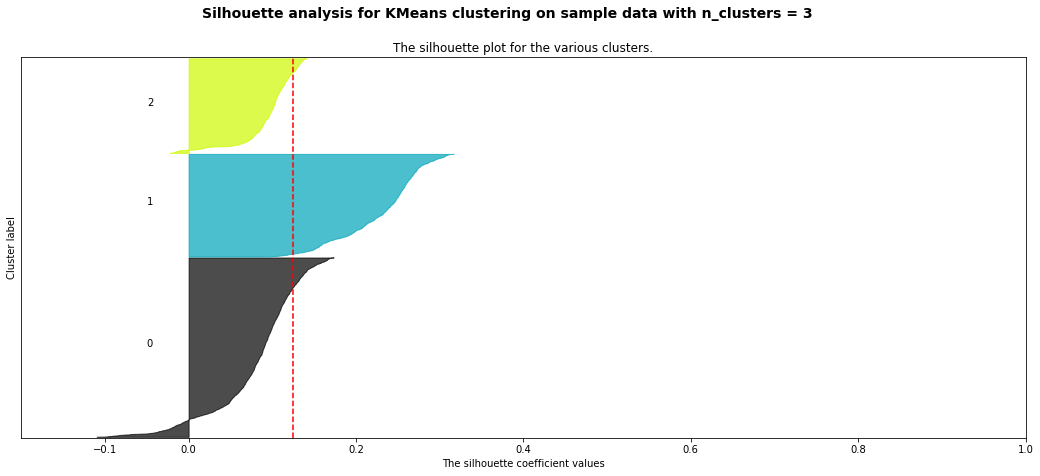

For n_clusters = 4 The average silhouette_score is : 0.1365384182832801


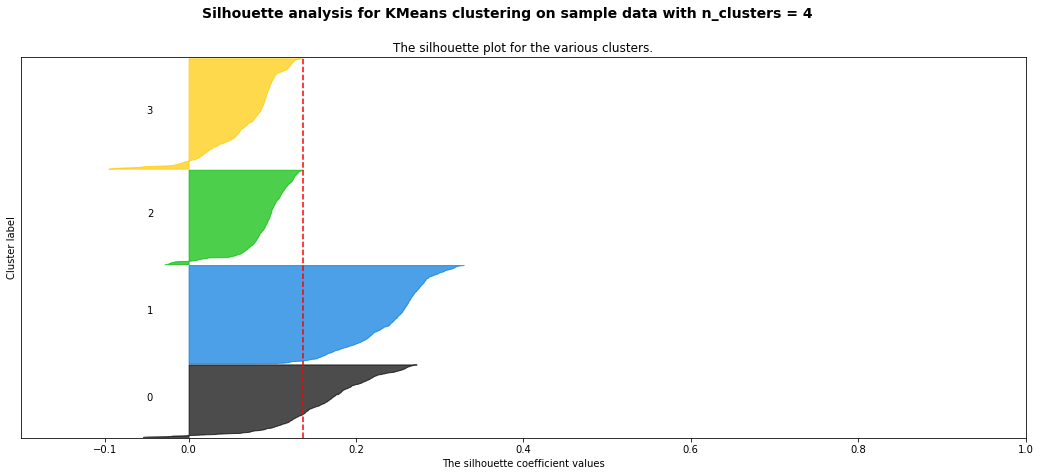

For n_clusters = 5 The average silhouette_score is : 0.16840431556139637


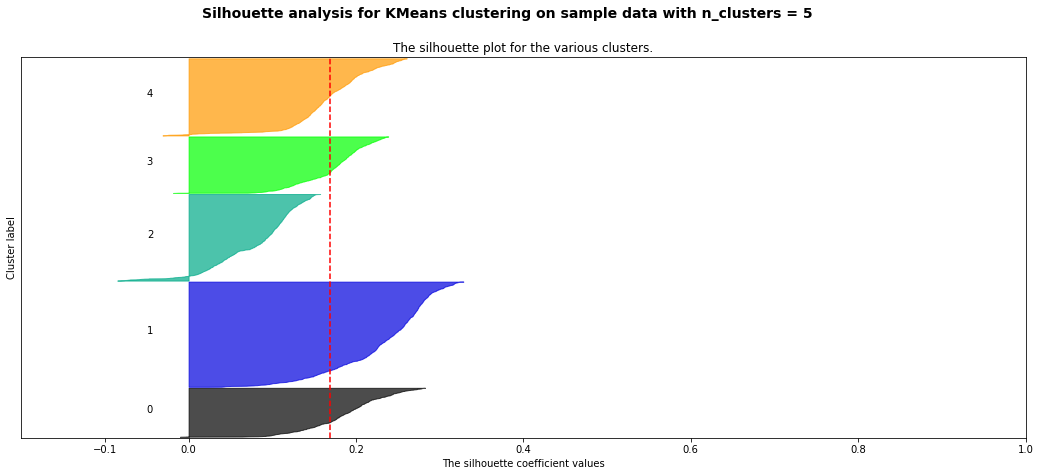

For n_clusters = 6 The average silhouette_score is : 0.16907448026536073


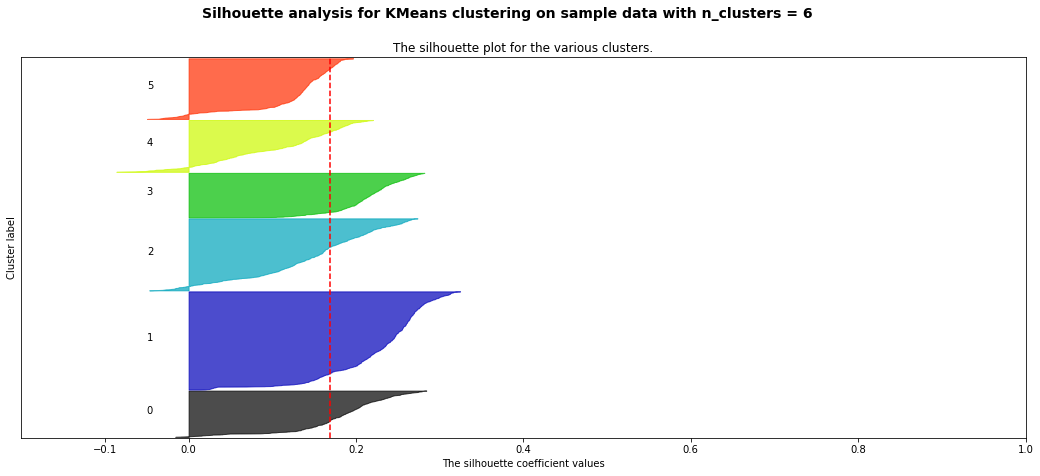

For n_clusters = 7 The average silhouette_score is : 0.15582632702035898


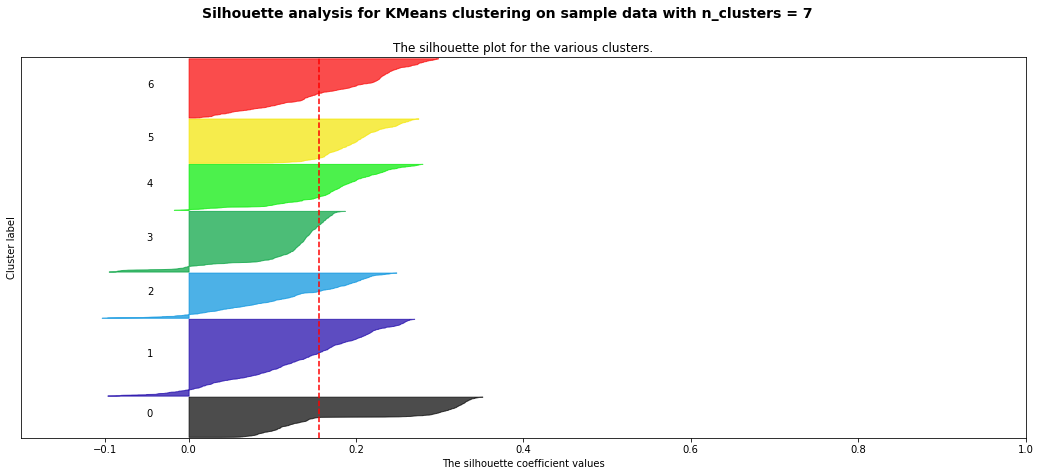

For n_clusters = 8 The average silhouette_score is : 0.1553378823746654


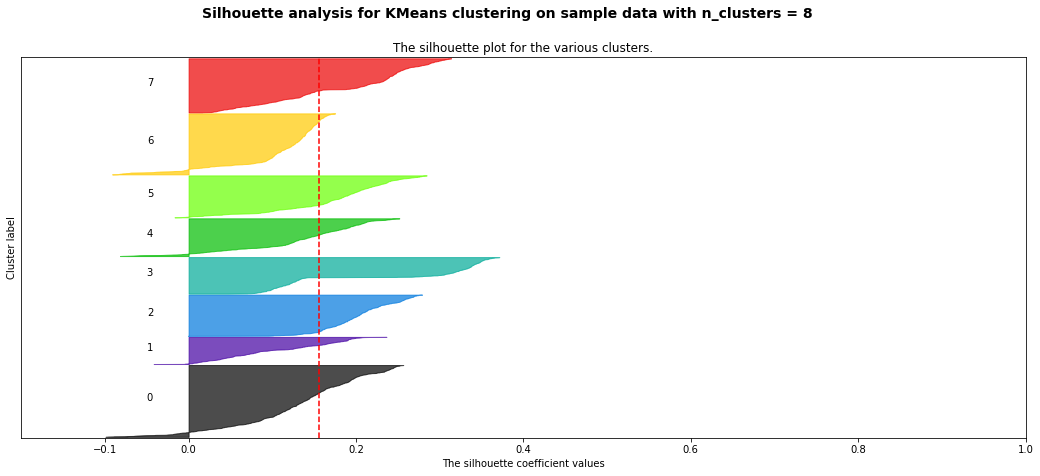

For n_clusters = 9 The average silhouette_score is : 0.15181660991754006


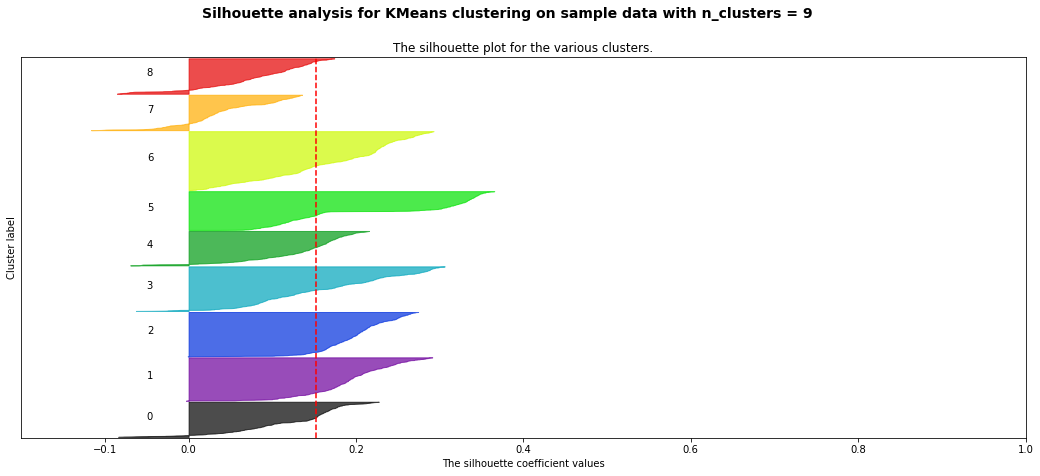

In [95]:
X = new_train
range_n_clusters = range(2,10)

# taken from sklearn
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors)

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1],
#                 marker='o', c="white", alpha=1, s=200)

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Prediction Clusters

In [101]:
for i in range(kmeans.n_clusters):
    print (i)

0
1
2
3
4
5


In [102]:
test_subset[predictions == 0]

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,climateChange,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,healthProblems,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload
2535,518.0,3.0,0.50,1,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2092,8103.0,1.0,0.50,1,0.50,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7232,31.0,4.0,0.25,1,0.50,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3879,1489.0,2.0,0.50,1,0.25,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3052,2480.0,3.0,0.50,1,0.25,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6394,419.0,1.0,0.50,0,0.25,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2690,12.0,1.0,0.50,1,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7300,819.0,2.0,0.75,1,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6354,2400.0,1.0,0.75,1,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6813,680.0,2.0,0.50,0,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [97]:
# Print out the centroids.
print("\nCluster centers:")
print(kmeans.cluster_centers_)


Cluster centers:
[[ 2.49508700e-01  2.17975207e-01  5.82128099e-01  7.14876033e-01
   5.38223140e-01  3.23347107e-01  6.19834711e-03  4.13223140e-03
   2.06611570e-03  6.19834711e-03  8.26446281e-03  1.85950413e-02
   0.00000000e+00  0.00000000e+00  2.06611570e-03 -8.02309608e-18
   4.11996826e-18 -2.00577402e-18  1.75640752e-17  1.75640752e-17
   2.06611570e-03  2.06611570e-03  3.80652800e-01  1.23966942e-02
   4.13223140e-03  1.03305785e-02  1.85950413e-02  8.26446281e-03
   2.06611570e-03  1.44628099e-02  1.23966942e-02  1.03305785e-02
   2.06611570e-03  8.26446281e-03  0.00000000e+00  1.86983471e-01
  -7.77156117e-16  9.00826446e-01  2.06611570e-03  4.13223140e-03
   1.24900090e-16 -5.20417043e-18  9.02056208e-17  3.95516953e-16
   0.00000000e+00 -6.67868538e-17  1.17961196e-16  4.13223140e-03
   2.87190083e-01  1.57024793e-01 -3.19189120e-16  2.14876033e-01
  -1.66533454e-16  7.02479339e-02 -6.93889390e-17  2.06611570e-03
   9.29752066e-02  1.71487603e-01  1.94289029e-16  3.33066

In [105]:
centroids = kmeans.cluster_centers_
centroids.shape

(6, 95)

In [121]:
# List of top 10 features for Cluster 0

indices_0 = np.argsort(centroids[0])[-1:-11:-1]

In [131]:
test_subset[predictions == 0].iloc[:, indices_0].head()

,workSatisfaction,enjoyment,feelingEmotion,tiredness,intensity,productivity,emotionDuration,bodySensationIntensity,enthusiastic,success
2535,1,1,1,0.50,0.50,0,60,0.5,0,0
2092,1,1,1,0.50,0.50,1,5,0.0,0,0
7232,1,1,1,0.25,0.50,0,30,0.0,0,1
3879,1,1,1,0.50,0.25,1,1,0.0,0,0
3052,1,1,1,0.50,0.25,1,15,0.0,0,0


In [191]:
num = 0
for c in centroids:
    top_ten = np.argsort(c)[-1:-11:-1]
    print ('Cluster #',num)
    print ('Indices: ', top_ten)
    print (test_subset[predictions == num].iloc[:, top_ten].head())
    print ()
    num += 1

Cluster # 0
Indices:  [64 37  3  2  4 85 22  5 48 90]
      workSatisfaction  enjoyment  feelingEmotion  tiredness  intensity  \
2535                 1          1               1       0.50       0.50   
2092                 1          1               1       0.50       0.50   
7232                 1          1               1       0.25       0.50   
3879                 1          1               1       0.50       0.25   
3052                 1          1               1       0.50       0.25   

      productivity emotionDuration  bodySensationIntensity  enthusiastic  \
2535             0              60                     0.5             0   
2092             1               5                     0.0             0   
7232             0              30                     0.0             0   
3879             1               1                     0.0             0   
3052             1              15                     0.0             0   

      success  
2535        0  
2092  

In [158]:
# set new column with cluster label, for plotting purposes

test_subset['label'] = pd.Series(predictions, index=test_subset.index)

In [160]:
test_subset.head()

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,climateChange,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,healthProblems,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload,label
4488,17207.0,2.0,0.25,1,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3055,2792.0,1.0,0.75,1,0.50,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2072,891.0,2.0,0.75,0,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2979,1181.0,3.0,0.00,0,0.75,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5
5388,4647.0,3.0,0.25,1,0.50,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4


In [192]:
test_subset['label'].value_counts()


1    344
2    241
5    234
0    169
4    155
3    144
Name: label, dtype: int64

In [134]:
sns.set(style="whitegrid", palette="muted")

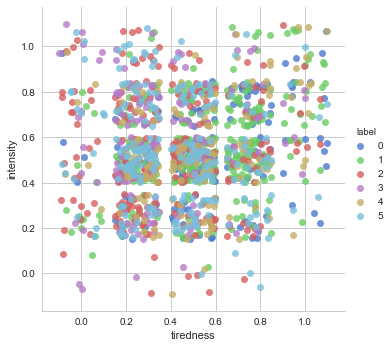

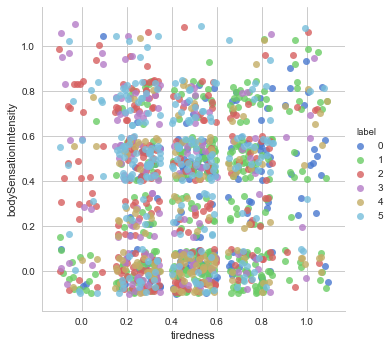

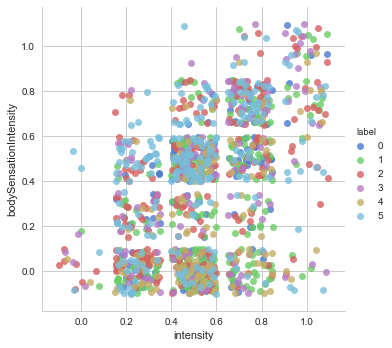

In [182]:
# fig, ax = plt.subplots(6, 1, figsize=(15, 12))

facet = sns.lmplot(data=test_subset, x='tiredness', y='intensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
facet2 = sns.lmplot(data=test_subset, x='tiredness', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
# facet3 = sns.lmplot(data=test_subset, x='tiredness', y='emotionDuration', hue='label', 
#                    fit_reg=False, legend=True, legend_out=True, x_jitter=0, y_jitter=0)
facet4 = sns.lmplot(data=test_subset, x='intensity', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
# facet5 = sns.lmplot(data=test_subset, x='intensity', y='emotionDuration', hue='label', 
#                    fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
# facet6 = sns.lmplot(data=test_subset, x='emotionDuration', y='bodySensationIntensity', hue='label', 
#                    fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)

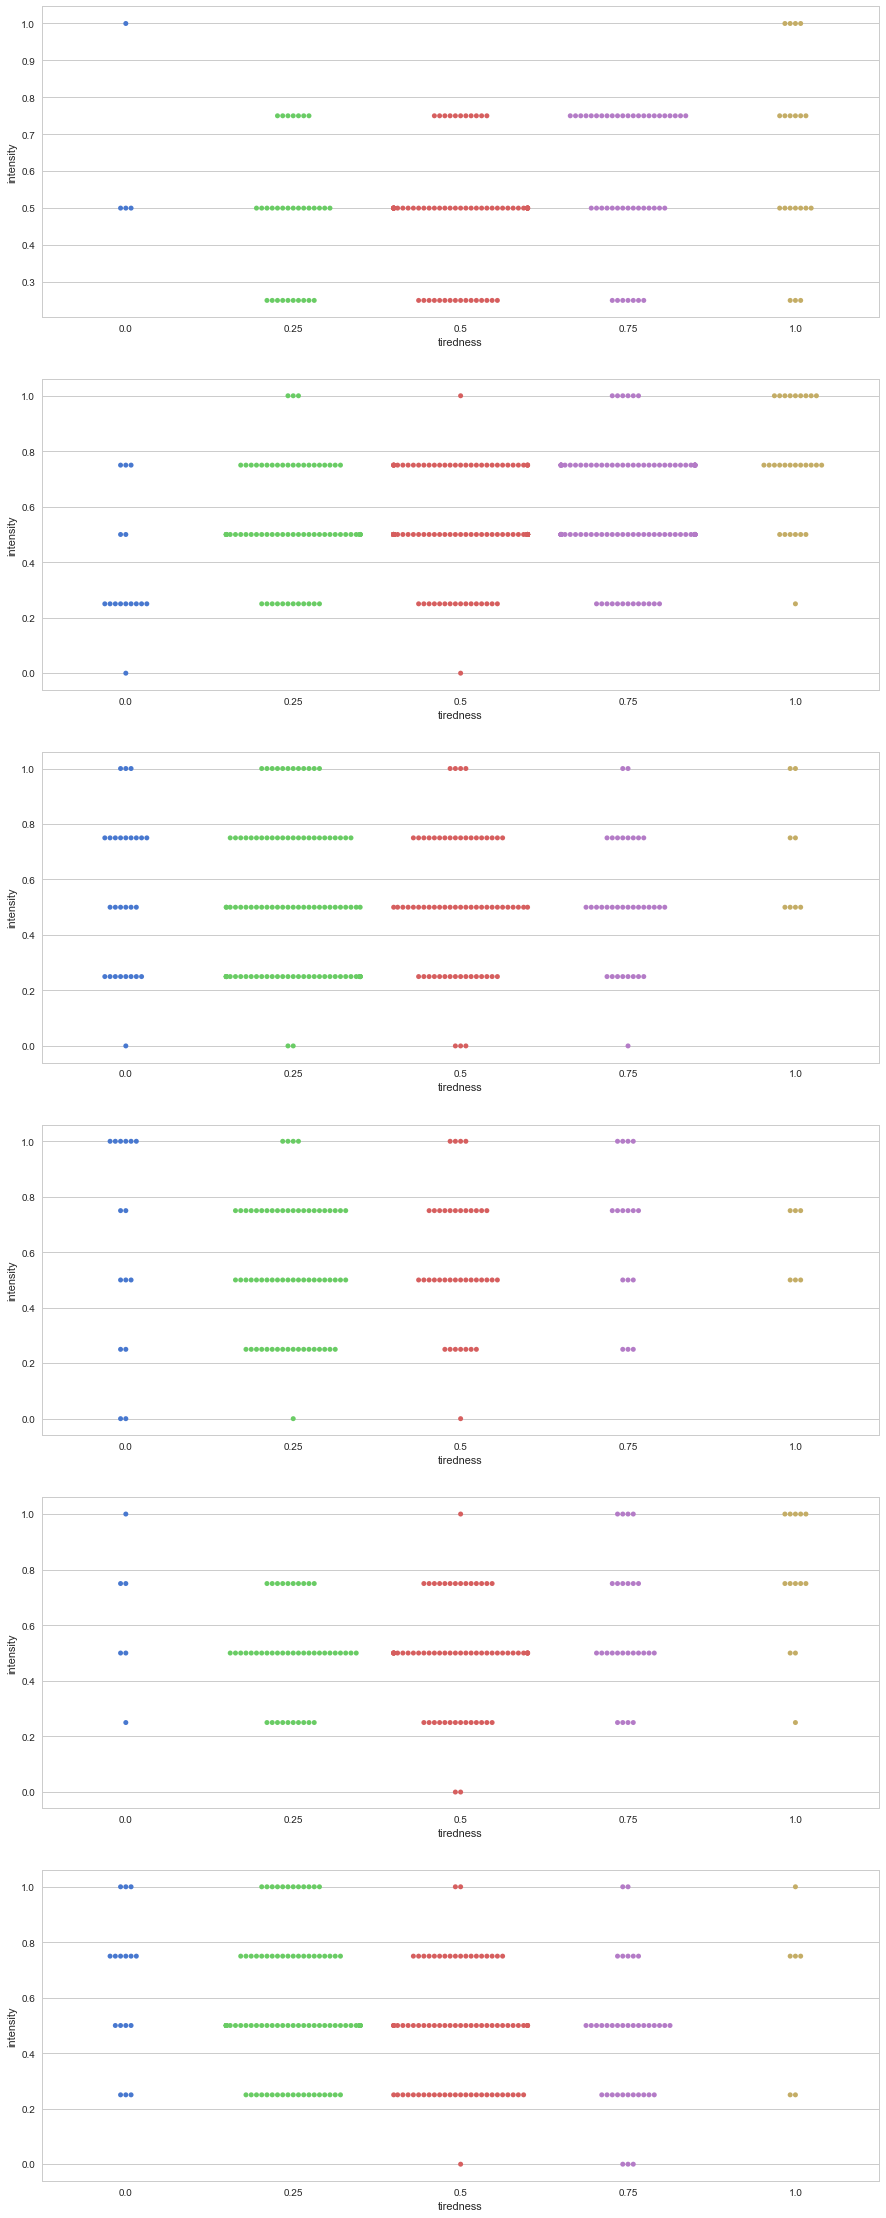

In [179]:
fig, ax = plt.subplots(6, 1, figsize=(15, 40))
for i in range(6):
    sns.swarmplot(x='tiredness', y='intensity', data=test_subset[predictions == i], ax=ax[i]);
# sns.swarmplot(x='tiredness', y='intensity', data=test_subset[predictions == 1], ax=ax[1]);
# sns.swarmplot(x='tiredness', y='intensity', data=test_subset[predictions == 2], ax=ax[2]);
# sns.swarmplot(x='tiredness', y='intensity', data=test_subset[predictions == 3], ax=ax[3]);
# sns.swarmplot(x='tiredness', y='intensity', data=test_subset[predictions == 4], ax=ax[4]);
# sns.swarmplot(x='tiredness', y='intensity', data=test_subset[predictions == 5], ax=ax[5]);

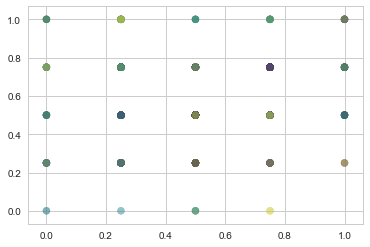

In [187]:
plt.scatter(test_subset['tiredness'], test_subset['intensity'], c=predictions, s=50, cmap='viridis', alpha = .2)

centers = kmeans.cluster_centers_
# plt.scatter(centers['tiredness'], centers['intensity'], c='black', s=200, alpha=0.5);

In [118]:
np.argsort(centroids[0])

array([36, 91, 50, 89, 92, 52, 75, 54, 80, 45, 67, 74, 15, 41, 17, 44, 12,
       13, 34, 70, 16, 18, 19, 77, 73, 42, 46, 40, 79, 58, 86, 62, 59, 93,
       43, 84, 63, 55, 78, 28, 20, 21,  8, 14, 32, 88, 82, 38, 66, 71, 76,
       60, 39,  7, 47, 24, 87,  9,  6, 27, 33, 10, 61, 25, 31, 83, 68, 81,
       23, 30, 94, 29, 11, 26, 65, 53, 56, 69, 49, 72, 57, 35, 51,  1,  0,
       90, 48,  5, 22, 85,  4,  2,  3, 37, 64])

In [ ]:
def  center_top_wordscenter_ (kmeans_model, svd_model, ftrs, num_words=10):
   '''
       Print out the top num_words for each of the centroids in the kmeans model,
       after we return the centroids back in 'word space' using the inverse SVD
       transformation
       
       input:
       kmeans_model -  kmeans model object
       svd_model - svd model object
       ftrs - the features from the TFIDF vectorizer
       num_words - number of words to display        
   '''
       
   num_words += 1
   
   ftrs_array = np.array(ftrs)

   centroids = svd_model.inverse_transform(kmeans_model.cluster_centers_)

   for c in centroids:
       ind = np.abs(c).argsort()
       ind = ind[-1:-num_words:-1]
       print(ftrs_array[ind], "\n")

In [129]:
# Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\nTop features (words) for each cluster:\n")
for num, centroid in enumerate(top_centroids):
        print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))


Top features (words) for each cluster:



NameError: name 'features' is not defined